# LP3 Final exam

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", 
as well as your name(s) and group number in the cell below:

In [21]:
NAMES = "Carl Örnberg"                # fill in your name(s) between the quotes, comma separated if more than one
GROUP = "23"                # fill in your group number between the quotes

Things to keep in mind: 

- Clarity in your solutions is important (both in your comments, code and plots).
- Use of AI tools is not permitted for coding in this exam, so that we ensure a level playing field for all students. However, you are allowed (and encouraged) to use the course materials (notebooks, textbooks etc) and if you need to, search engines like Google etc. 
- No late assignments will be accepted for the LP3 final.
- For clarifications please contact the teacher Gina Panopoulou via email at georgiap@chalmers.se

---

# Problem 1 (12 pts): Errors

As we discussed during the lectures, sometimes it is best to rewrite functions to avoid for example catastrophic cancellation (e.g. Lecture on Errors and book on Numerical Methods by Gezerlis, chapter 2). 
Rewrite the following expressions in order to evaluate them for large values of $x$. 

1) $\bf \sqrt{x+1}-\sqrt{x}$

2) $\bf {1\over{x+1}} - {2\over{x}} + {1\over{x-1}}$

3) $\bf {1\over{\sqrt{x}}} - {1\over{\sqrt{x+1}}}$

- Define and test the before and after functions in python.
- Plot the three functions in a three panel plot for the range ${\bf xs}$ defined below. Do not forget to import the required packages.

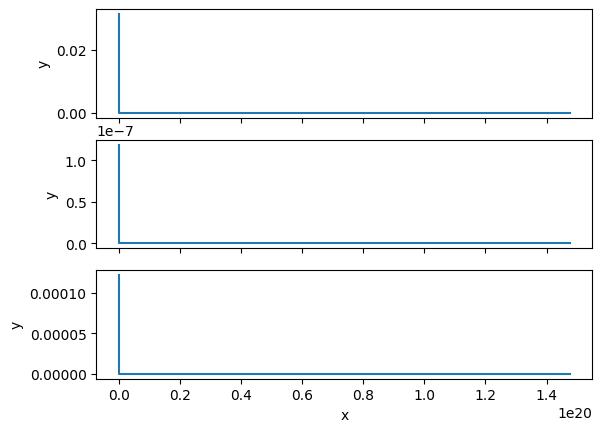

In [22]:
import sys
large = sys.maxsize
import numpy as np
xs= np.array([2.**i*large for i in range(-55,5)])
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 1, sharex=True)


# BEGIN SOLUTION

def f1(x):
    return np.sqrt(x+1) - np.sqrt(x)

def f1n(x):
    return 1 / (np.sqrt(x+1) + np.sqrt(x))

def f2(x):
    return (1/(x+1) - 2/x+ 1/(x-1))

def f2n(x):
    return 2/(x**3-x)

def f3(x):
    return (1/np.sqrt(x)-1/np.sqrt(x+1))

def f3n(x):
    return 1 / (np.sqrt(x**2 + x)*(np.sqrt(x+1) + np.sqrt(x)))


ax[0].set_ylabel('y')

ax[1].set_ylabel('y')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

ax[0].plot(xs, f1n(xs))
ax[1].plot(xs, f2n(xs))
ax[2].plot(xs, f3n(xs))


plt.show()
# END SOLUTION

# Problem 2: Differentiation

You have a data set of the following values $\bf V=[1,4,6]$ for a measured volume of water (in liters) at times $\bf t=[1,2,5]$. You want to estimate the rate of change $\bf q$ in your volume of water at $\bf t=2$ (meaning that you want to determine the derivative $\bf q=dV/dt$ at time $\bf t=2$).

## Problem 2a (10 pt):

- Estimate, **without using ```np.gradient```**, the value for $\bf q(t=2)$. Use the information in all three data points (so for all three times $\bf t=[1,2,5]$) to get the best estimate of $\bf q$. Write the analytical formula you used in a Markdown Box and implement it in a function that can take the arrays of data and time as an input.

[Hint: as you can see, the spacing in time is not equal. By using a *weighted* combination of the forward and backward methods (similar to our derivation of the central method, where we took the unweighted average), you can derive a function for the approximation of $\bf q$ ($\bf \tilde q$) that depends on $\bf V(t=1), V(t=2), $and $\bf V(t=5)$.]

- Then include in your code the forward method to approximate the value of $\bf q$ at $\bf t=1$ and the backward method to approximate $\bf q$ at $\bf t=5$

**Your analytical function here:** 
$$V'(t_1) \approx \frac{V(t_1+t_2) - V(t_1)}{t_2-t_1}*\frac{t_1-t_0}{t_2-t_0} + \frac{V(t_0+t_1) - V(t_0)}{t_1-t_0}*\frac{t_2-t_1}{t_2-t_0}$$
Notice that we use the interval between $t_1$ and $t_0$ for the first weight, this is because a shorter time interval should giva a closer approximation and we then want a bigger weight (it matters more).


In [23]:
import numpy as np
data=np.array([1,4,6])
t=np.array([1,2,5])

# BEGIN SOLUTION
def forward(x, data, n):
    h = t[n+1] - t[n]
    f_prime = (data[n+1] - data[n]) / h
    return f_prime

def backward(x, data, n):
    h = t[n] - t[n-1]
    f_prime = (data[n] - data[n-1]) / h
    return f_prime

def f_prime_wighted(x, data, n):
    """Function that takes three inputs and calculates the estimated derivative at a point
    x = the array of t-values, or what the function depends on
    data = data points of the function
    n = what index the derivative should be approximated at
    """
    f_prime_1 = forward(t, data, n-1)
    f_prime_2 = backward(t, data, n+1)
    w_1 = abs((x[n+1] - x[n]) / (x[n+1] - x[n-1]))
    w_2 = abs((x[n-1] - x[n]) / (x[n+1] - x[n-1]))
    f_prime = f_prime_1*w_1 + f_prime_2*w_2
    return f_prime

der_t_1 = f_prime_wighted(t, data, 1)
der_t_2 = forward(t, data, 0)
der_t_3 = backward(t, data, 2)

print("Approximated derivative at t=2: {}, at t = 0: {}, at t = 5: {}".format(der_t_1, der_t_2, der_t_3))

#END SOLUTION

Approximated derivative at t=2: 2.4166666666666665, at t = 0: 3.0, at t = 5: 0.6666666666666666


## Problem 2b (3 pt):

- Then calculate $q$ using ```np.gradient``` and check how close your result is to the best approximation (the result for $\bf t=2$ should be $2.4166$ using np.gradient; you might have been able to reproduce this exactly, but if your approximation is between $1.8$ and $3.0$ it is good enough).
- If there is a difference between your result and the result from ```np.gradient``` explain why you think there is a difference (also when your result is different from 2.4166, but still between 1.8 and 3.0!).


In [24]:
# BEGIN SOLUTION
dVdt = np.gradient(data, t)
dVdt_2 = dVdt[1]
print(dVdt_2)

#We got the same result as np.gradient

2.4166666666666665


**Your explanation about the difference (if any) here:**

## Problem 2c (5 pt):
- Finally, using ```matplotlib```, make a plot of the three data points and also draw the tangent (the straight line that touches the data point with a slope equal to the derivative) for the three points derived with ```np.gradient``` and with your own method in 2a.

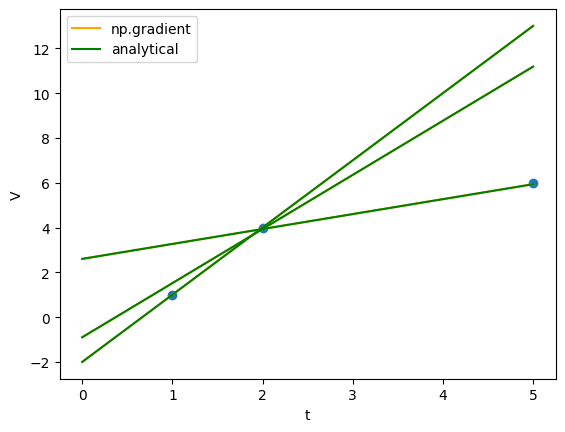

In [25]:

# BEGIN SOLUTION

plt.scatter(t, data)

x_2_g = np.arange(0,6, 1)
y_2_g = dVdt[1] * x_2_g - 0.9
y_1_g = dVdt[0]*x_2_g - 2
y_3_g = dVdt[2]*x_2_g + 2.6
y_2 = der_t_1*x_2_g -0.9
y_1 = der_t_2*x_2_g -2
y_3 = der_t_3*x_2_g + 2.6





plt.plot(x_2_g, y_2_g, color="orange", label="np.gradient")
plt.plot(x_2_g, y_1_g, color="orange")
plt.plot(x_2_g, y_3_g, color="orange")

plt.plot(x_2_g, y_2, color="green", label="analytical")
plt.plot(x_2_g, y_1, color="green")
plt.plot(x_2_g, y_3, color="green")


plt.xlabel("t")
plt.ylabel("V")
plt.legend()
plt.show()
# END SOLUTION

# Problem 3: Two dimensional gradient

Here you will use the numpy ```np.gradient``` function to calculate the gradient of a 2 dimensional function.
\begin{equation}
\bf f(x,y) = y e^{-x^2-y^2}
\end{equation}

## Problem 3a (4 pt):

Plot $\bf f(x,y)$ in $\bf [-2,2]\times[-2,2]$. Use a contour plot (using the ```contour``` function and NOT the filled contour function ```contourf```). Make sure to select a reasonable number of contours and make the positive values *red* and negative values *blue*.


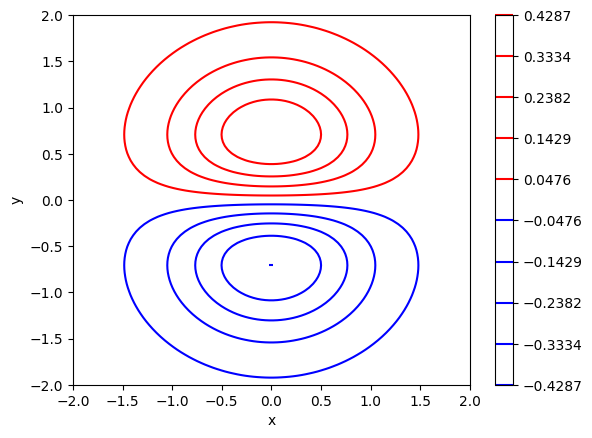

In [26]:
# BEGIN SOLUTION
def f(x,y):
    return y * np.exp(-x**2 - y**2)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
levels = np.linspace(np.min(Z), np.max(Z), 10)


plt.contour(x, y, Z, levels = levels, colors = ['blue' if i < 0 else 'red' for i in levels])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# END SOLUTION

## Problem 3b (2 pt):

Compute the gradient of $\bf f$ (using ```np.gradient``` with a spacing of $\bf h_x = h_y = 0.1$) and store it in the array $\bf dx$ and $\bf dy$.

In [27]:

# BEGIN SOLUTION
hx = hy = 0.1

dx, dy = np.gradient(Z, hx, hy)


#END SOLUTION

## Problem 3c (4 pt):

Make a new plot where you overplot the gradient of $\bf f(x,y)$ using an quiver plot (arrows) on top of the contours of $\bf f(x,y)$ using the same intervals of $\bf x$ and $\bf y$ as you used in 3a. Make sure the plot is big enough to see the arrows. You should make it so that the arrows in the quiver plot point **from the positive to the negative!** (so remember the correct order of the quiver parameters). 

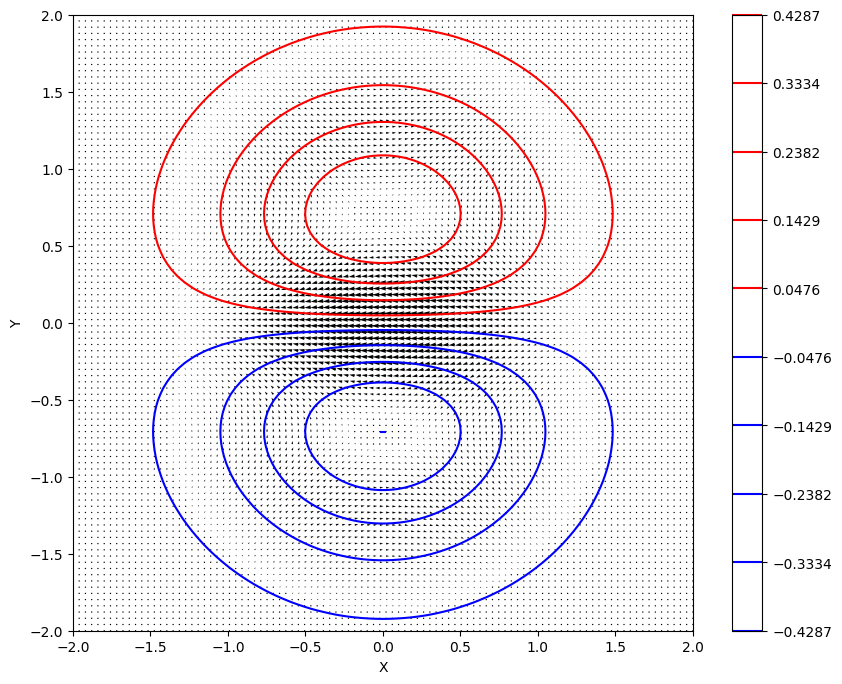

In [28]:
# BEGIN SOLUTION

plt.figure(figsize=(10, 8))
plt.quiver(X, Y, -dx, -dy, scale=30,  color='black')
plt.contour(x, y, Z, levels = levels, colors = ['blue' if i < 0 else 'red' for i in levels])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
# END SOLUTION

# Problem 4: Compute the determinant of a matrix using the LU-decomposition

You've already seen that one could use the LU-decomposition to compute the the inverse of a matrix.
Here you'll see that LU-decomposition can also be used to compute the determinant of a matrix.

## Problem 4a (5 pt):
Assume we can LU-decomppose the matrix $\pmb{A}$ such as $\pmb{A}=\pmb{L}\pmb{U}$. Knowing that **i)** the determinant of the product of two matrices is equal to the product of the two matrix determinants and **ii)** the determinant of a triangular matrix is the product of the diagonal elements, **prove** (using math formatting in a markdown cell) that 
$$
\det(\pmb{A}) = \prod_{i=0}^{n-1} U_{ii} 
$$

**4a: Your answer here:** 
$$
\det(\mathbf{A}) = \det(\mathbf{L}\mathbf{U}) = \det(\mathbf{L})\det(\mathbf{U}) = \prod_{i=0}^{n-1} 1 \prod_{i=0}^{n-1} U_{ii} = \prod_{i=0}^{n-1} U_{ii}
$$



## Problem 4b (3 pt):
Use the equation above to write a function that computes the determinant of a matrix using the LU-decomposition (function ```ludec``` seen in the course). 

In [29]:
# Matrix creation
def testcreate(n,val):
    A = np.arange(val,val+n*n).reshape(n,n)
    A = np.sqrt(A)
    bs = (A[0,:])**2.1
    return A, bs
A, _ = testcreate(4, 21)

# 4b
# BEGIN SOLUTION
def ludec(A):
    n = A.shape[0]
    U = np.copy(A)
    L = np.identity(n)
    for j in range(n-1):
        for i in range(j+1, n):
            coef = U[i, j]/U[j, j]
            U[i,j:] = U[i,j:] - U[j,j:] * coef
            L[i,j] = coef
    return L, U

L, U = ludec(A)
diag = np.diag(U)
det = np.prod(diag)

# END SOLUTION

## Problem 4c (2 pt):
Use your function to compute the determinant of the matrix $\pmb{A}$, which is already defined in the previous code cell. Compare the result of your function with the result of ```np.linalg.det```.

In [30]:
# 4c
# BEGIN SOLUTION
det_linalg = np.linalg.det(A)

print("This is the determinant calculated with LU-decomposition {} and this is the determinant calculated with np.linalg.det {}".format(det, det_linalg))

# END SOLUTION

This is the determinant calculated with LU-decomposition -7.450566894313978e-12 and this is the determinant calculated with np.linalg.det -7.450566849326575e-12


# Problem 5: Save LU-decomposition storage needs

## Problem 5a (10 pt):
The LU-decomposition returns two matrices $\pmb{L}$ and $\pmb{U}$. To save some memory, these lower and upper triangular matrices could be stored into one single matrix $\pmb{M}$ (note that the ones in the diagonal of $\pmb{L}$ are not in $\pmb{M}$ anymore).

$$
\textrm{Instead of storing }\pmb{L}=
\begin{pmatrix}
1 & 0 & 0 & 0\\
L & 1 & 0 & 0\\
L & L & 1 & 0\\
L & L & L& 1\\
\end{pmatrix}
\textrm{ and } \pmb{U}=
\begin{pmatrix}
U & U & U & U\\
0 & U & U & U\\
0 & 0 & U & U\\
0 & 0 & 0 & U\\
\end{pmatrix}
\textrm{ we only store } \pmb{M}=
\begin{pmatrix}
U & U & U & U\\
L & U & U & U\\
L & L & U & U\\
L & L & L & U\\
\end{pmatrix}
$$

Modify the LU-decomposition function ```ludec``` seen in the lecture so that it returns only one matrix $\pmb{M}$. Creating $\pmb{L}$ and $\pmb{U}$ separately and just merging them together into $\pmb{M}$ is not accepted. Ensure that your $\pmb{M}$ matrix is indeed a combination of $\pmb{L}$ and $\pmb{U}$ obtained with the orignal ```ludec``` function.

In [31]:
# 5a
# BEGIN SOLUTION
def ludec_M(A):
    n = A.shape[0]
    M = np.copy(A)
    for j in range(n-1):
        for i in range(j+1, n):
            coef = M[i, j]/M[j, j]
            M[i,j:] = M[i,j:] - M[j,j:] * coef
            M[i,j] = coef
    return M

# END SOLUTION

## Problem 5b (6 pt):
Now write a function to solve a system of linear equations using your modified LU-decomposition, thus handling a single $\pmb{M}$ matrix. This function is a modified version of ```lusolve```, seen in the lecture.

In [32]:
# 5b
# BEGIN SOLUTION

def forwsub(L, b):
    n = np.size(b)
    xl = np.zeros(n) # initialise result array
    for i in range(n):
        xl[i] = (b[i] - L[i,:i]@xl[:i])/L[i,i]
    return xl


def backsub(U, b):
    n = np.size(b)
    xu = np.zeros(n) # initialise result array
    for i in reversed(range(n)):
        xu[i] = (b[i] - U[i,i+1:]@xu[i+1:])/U[i,i]
    return xu

def lusolve(A, b):
    M = ludec_M(A)
    L  = np.array([[M[i][j] if i > j else 0 for j in range(len(M))] for i in range(len(M))])
    np.fill_diagonal(L,1)
    U = np.array([[M[i][j] if i <= j else 0 for j in range(len(M))] for i in range(len(M))])
    y = forwsub(L, b)
    x = backsub(U, y)
    return x


# END SOLUTION

## Problem 5c (4 pt):
Test your functions on the given system $\pmb{Ax}=\pmb{b}$

In [33]:
# 5c
A, b = testcreate(4, 21)  # the A and b in Ax = b
# BEGIN SOLUTION
x_linalg = np.linalg.solve(A, b)
x_lu = lusolve(A, b)

print("This is the soulution with LU-decomposition {}".format(x_lu))
print("This is the soulution with np.linalg.solve {}".format(x_linalg))
# END SOLUTION

This is the soulution with LU-decomposition [ 17118.9554009  -55069.99934969  58822.07580723 -20866.39246612]
This is the soulution with np.linalg.solve [ 17118.95550576 -55069.99968223  58822.07615807 -20866.39258927]


# Problem 6: Modified QR decomposition
In the lecture on eigenvalues, we've seen how to construct the orthogonal matrix Q by finding one by one its column vectors. The process we followed is called the classical _Gram-Schmidt_ orthogonalization algorithm. Conceptually, this process produces new vectors $a'_j$ by subtracting out any non-orthogonal components of the original vectors $a_j$ (See the Section QR Decomposition in the Chapter on Matrices in the Numerical Methods by Gezerlis book). 

The classical version of the algorithm is highly sensitive to numerical errors and can behave poorly.

Below is the _modified Gram-Schmidt_ python implementation, which solves that issue:
``` Python
for i in range(n):
    R[i,i] = np.linalg.norm(Ap[:,i])
    Q[:,i] = Ap[:,i]/R[i,i]
    for j in range(i+1,n):
        R[i,j] = np.sum(Q[:,i]*Ap[:,j])
        Ap[:,j] -= R[i,j]*Q[:,i]
        
# with:
# n is the number of rows/columns of the matrix A being QR-decomposed
# Ap is the matrix of a' vectors (similar concept a for the classical QR-decomposition)
# Q and R are the results of the QR-decomposition A = Q.R
```
## Problem 6a (4 pt): 
Write the function ```qrdecmod``` using the _modified Gram-Schmidt_ python implementation shown above.

In [34]:
# qrdec will be used for comparison
def qrdec(A):
    n = A.shape[0]
    Ap = np.copy(A)
    Q = np.zeros((n,n))
    R = np.zeros((n,n))

    for j in range(n):
        for i in range(j):
            R[i,j] = np.sum(Q[:,i]*A[:,j])
            Ap[:,j] -= R[i,j]*Q[:,i]

        R[j,j] = np.linalg.norm(Ap[:,j])
        Q[:,j] = Ap[:,j]/R[j,j]

    return Q, R

# 6a
# BEGIN SOLUTION
def qrdecmod(A):
    n = A.shape[0]
    Ap = np.copy(A)
    Q = np.zeros((n,n))
    R = np.zeros((n,n))

    for i in range(n):
        R[i,i] = np.linalg.norm(Ap[:,i])
        Q[:,i] = Ap[:,i]/R[i,i]
        for j in range(i+1,n):
            R[i,j] = np.sum(Q[:,i]*Ap[:,j])
            Ap[:,j] -= R[i,j]*Q[:,i]

        R[j,j] = np.linalg.norm(Ap[:,j])
        Q[:,j] = Ap[:,j]/R[j,j]

    return Q, R

# END SOLUTION

## Problem 6b (3 pt):
Use again ```testcreate(4, 21)``` from the previous exercises to create a $4 \times 4$ matrix $\pmb{A}$ and QR-decompose it using ```qrdec``` and ```qrdecmod```. 

In [35]:
# 6b
# BEGIN SOLUTION
A, b = testcreate(4, 21)

Q_1, R_1 = qrdec(A)
Q_2, R_2 = qrdecmod(A)

# END SOLUTION

## Problem 6c (5 pt):
- Using a known property of the Q matrix, show that the result from the classical _Gram-Schmidt_ algorithm implemented in ```qrdec``` is flawed. Explain what the flaw is.
- Using your results from the previous questions, show that the _modified Gram-Schmidt_ handles that flaw better.

In [36]:

# 6c
# BEGIN SOLUTION
I_Q_1 = np.transpose(Q_1)@Q_1 - np.identity(np.shape(Q_1)[0])
I_Q_2 = np.transpose(Q_2)@Q_2 - np.identity(np.shape(Q_2)[0])

#This should produce identety matricies if there were no errors

print("Q_1 matrix-multiplied with its transpose\n: {}\n".format(I_Q_1))

#The flaw comes from that as the algorithm progresses, errors accumulate because each vector Ap[:,j] is modified multiple times.
#Since there is some round of errors every time a calculations is made, these errors accumulate over time and gives bigger error than the modified computations


#This showes that the modified method handles errors better
print("Q_1 matrix-multiplied with its transpose\n: {}".format(I_Q_2))
# ENDSOLUTION

Q_1 matrix-multiplied with its transpose
: [[-1.11022302e-16  6.80613072e-14 -4.11394511e-11  1.01341194e-08]
 [ 6.80613072e-14  0.00000000e+00 -1.00756776e-08  4.33797450e-06]
 [-4.11394511e-11 -1.00756776e-08 -1.11022302e-16  4.48869105e-03]
 [ 1.01341194e-08  4.33797450e-06  4.48869105e-03  2.22044605e-16]]

Q_1 matrix-multiplied with its transpose
: [[-1.11022302e-16  6.80613072e-14 -4.11696880e-11  1.01610193e-08]
 [ 6.80613072e-14  0.00000000e+00 -1.73356411e-13  9.66354514e-11]
 [-4.11696880e-11 -1.73356411e-13 -2.22044605e-16  1.46717693e-13]
 [ 1.01610193e-08  9.66354514e-11  1.46717693e-13 -2.22044605e-16]]


## Problem 6d (8 pt):
Let's define the error in the orthonormalisation of $\pmb{Q}$ as the norm of $\pmb{I-Q^TQ}$, where $\pmb{I}$ is the identity matrix.
- Write a function ```orthoerror(Q)``` that returns that error for any orthogonal matrix $\pmb{Q}$ passed as an argument. 
- Compute and plot (on the same graph) the errors for the two methods ```qrdec``` and ```qrdecmod``` as a function of the dimension $k \times k$ of the matrix $\pmb{A}$. Use again ```testcreate(k, 21)``` to create the matrices $\pmb{A}$. Take $k = 2,4,8,16,32,64, 128$. Label the plot properly.

[]

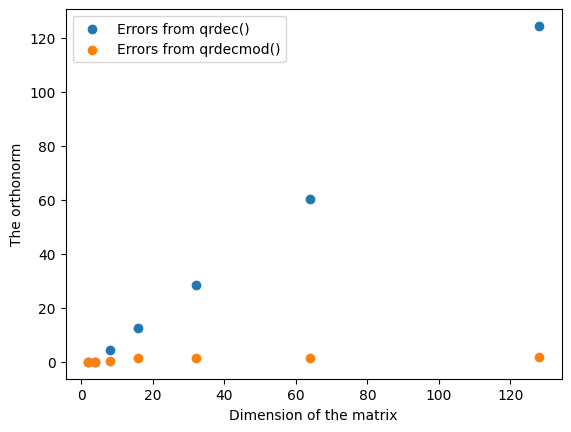

In [37]:
# 6d
# norm -> np.linalg.norm
# Range of sizes of the matrix A
k = np.array((2, 4, 8, 16, 32, 64, 128))

# BEGIN SOLUTION
def orthoerror(Q):
    I_Q_norm = np.linalg.norm(np.identity(np.shape(Q)[0]) - np.transpose(Q)@Q)
    return I_Q_norm

F_qrdec = []
F_qrdecmod = []

for i in range(len(k)):
    A_k, b0 = testcreate(k[i], 21)
    N_1, b1 = qrdec(A_k)
    N_2, b2 = qrdecmod(A_k)

    N_norm_1 = orthoerror(N_1)
    N_norm_2 = orthoerror(N_2)
    F_qrdec.append(N_norm_1)
    F_qrdecmod.append(N_norm_2)


plt.xlabel("Dimension of the matrix")
plt.ylabel("The orthonorm")

plt.scatter(k, np.array(F_qrdec), label="Errors from qrdec()")
plt.scatter(k, np.array(F_qrdecmod), label="Errors from qrdecmod()")
plt.legend()
plt.plot()

# END SOLUTION

# Problem 7: Solve a system of linear equation using the QR-decompostion (10 pts)

One can solve the systen $\pmb{Ax} = \pmb{b}$ using by QR-decomposing $\pmb{A}=\pmb{QR}$. Take a moment to remind yourself the properties of $\pmb{Q}$ and $\pmb{R}$.

## Problem 7a (6 pt):
Inside a markdown cell with a proper math formatting:

Start from $\pmb{Ax} = \pmb{b}$ and QR-decompose $\pmb{A}$. Arrive at an expression that allows you to solve the system (explain how you would do that). 

Clarify each step (~3 steps). There should be no matrix inversion. 

**7a: Your answer here:** 
$$\mathbf{Ax} = \mathbf{b}$$
$$\mathbf{QRx} = \mathbf{b}$$ 
$$\mathbf{Rx} = \mathbf{Q^Tb}$$

Because R is an upper triangular matrix we can use the backward substituion method.


## Problem 7b (4 pt):
Write a code to apply your method and compare its results with numpy's solver for systems of linear equations. You can use either the ```qrdec``` or ```qrdecmod```.

In [38]:
# 7b
# BEGIN SOLUTION
A, b = testcreate(3, 21)
Q, R = qrdecmod(A)
x_num_s = backsub(R, np.transpose(Q)@b)

x_s = np.linalg.solve(A, b)

print("The numeric soulution is {}, linalg soulution is {}".format(x_num_s, x_s))
# END SOLUTION

The numeric soulution is [-970.37746036 1958.95272018 -983.56700608], linalg soulution is [-970.37745478 1958.95270879 -983.56700027]
